<a href="https://colab.research.google.com/github/pratik1235/Image-Classification-Cifar10/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf


TensorFlow 2.x selected.


In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
#from tensorflow.keras.utils import np_utils
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
from PIL import Image
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
#!wget --no-check-certificate \ https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz  -o cfr.tar.gz

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


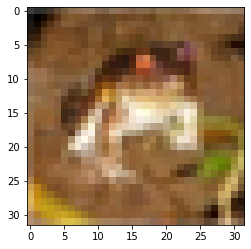

In [ ]:
X_train.shape
X_train[0].shape
img=X_train[0]
plt.imshow(img)

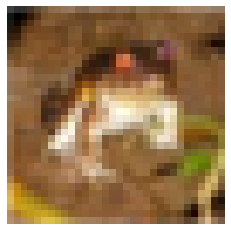

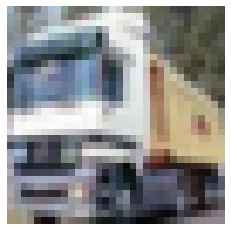

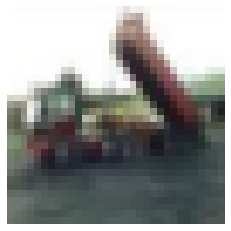

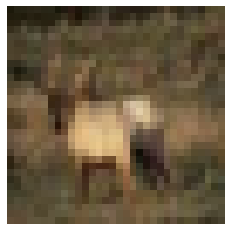

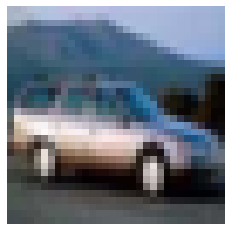

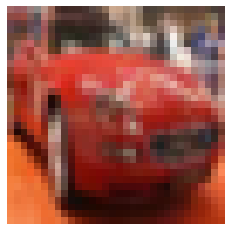

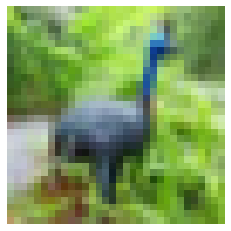

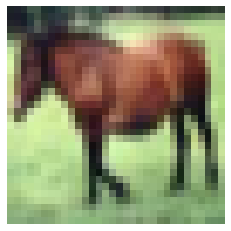

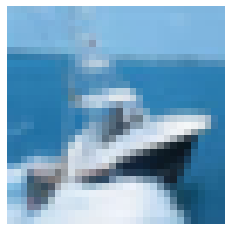

In [ ]:
import matplotlib.image as mpimg
for x in range(9):

  img=X_train[x]    #Reads an image from a file into an array.
  plt.imshow(img)     
  plt.axis('off')   #omits x and y axis lines
  plt.show()

In [ ]:
print(X_train[0])  #it is of the shape 32*32*3

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
#data preprocessing
np.random.seed(6)
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

#normalize the inputs from 0-255 to 0.0 - 1.0
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train/=255.0
X_test/=255.0


In [ ]:

'''
#converting class labels into onehot vector of length 10 (10 for 10 classes))
#since there is biases towards higher numbers so one hot encoding  normalizes the network
from tensorflow.keras import utils as np_utils
y_train= np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_class=y_test.shape[1]
num_class

'''

10

In [ ]:
y_test.shape
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import seaborn as sns
# import numpy as np

# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing import image

# a=train_labels['label']
# a = pd.get_dummies(a)


**Building ALL CNN model**



In [ ]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
#from keras import Sequential
from tensorflow.python.keras.layers import Convolution2D

from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import BatchNormalization

In [ ]:
classifier= Sequential()

classifier.add(Convolution2D(32,(3,3),activation='relu', input_shape=(32,32,3)))  #input shape needs only these three not the batch size ...keras will add that itself
#classifier.add(MaxPooling2D(pool_size=(2,2)))   #default stride is pool size i.e here 2
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(64,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))

#classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(128,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(64,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Flatten())

classifier.add(Dense(512,activation='relu'))  #don't write output_dim, just write the number
classifier.add(Dense(10,activation='softmax'))

classifier.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

classifier.summary()             #prints a summary representation of your model




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

If your targets are one-hot encoded, use ***categorical_crossentropy***.

Examples of one-hot encodings:

[1,0,0]

[0,1,0]

[0,0,1]

But if your targets are integers, use ***sparse_categorical_crossentropy***.

Examples of integer encodings (for the sake of completion):

1

2

3


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=0,  
        zoom_range = 0.0,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False)

# data generator model to train and validation set
batch_size_1 = 500  #batch of augmented data
train_gen = datagen.flow(X_train, y_train)
val_gen = datagen.flow(X_test, y_test)

In [ ]:
history = classifier.fit_generator(train_gen, 
                              epochs = 150, 
                              steps_per_epoch = X_train.shape[0] // 32,
                              validation_data = val_gen,
                              validation_steps = X_test.shape[0] // 32,verbose=1)
classifier.save("cifar10.h5")


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1562 steps, validate for 312 steps
Epoch 1/150
1562/1562 [==============================] - 37s 24ms/step - loss: 1.4366 - accuracy: 0.4862 - val_loss: 1.1651 - val_accuracy: 0.5755
Epoch 2/150
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0709 - accuracy: 0.6209 - val_loss: 0.9670 - val_accuracy: 0.6573
Epoch 3/150
1562/1562 [==============================] - 29s 19ms/step - loss: 0.9199 - accuracy: 0.6761 - val_loss: 0.9600 - val_accuracy: 0.6607
Epoch 4/150
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8365 - accuracy: 0.7059 - val_loss: 0.9195 - val_accuracy: 0.6796
Epoch 5/150
1562/1562 [==============================] - 29s 19ms/step - loss: 0.7787 - accuracy: 0.7264 - val_loss: 0.7948 - val_accuracy: 0.7206
Epoch 6/150
1562/1562 [==============================] - 29s 19ms/step - loss: 0.7337 - accura

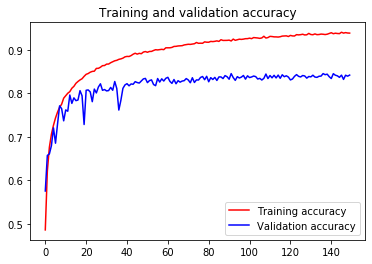

<Figure size 432x288 with 0 Axes>

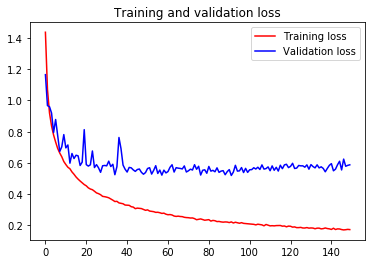

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()


plt.show()


epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.figure()


plt.show()


In [ ]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:

from mlxtend.plotting import plot_confusion_matrix
y_pred=classifier.predict_classes(X_test)
y_pred

array([3, 8, 9, ..., 5, 1, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_pred)
mat


array([[893,  14,  18,  11,   1,   2,   6,   4,  33,  18],
       [  7, 946,   3,   0,   1,   0,   8,   1,   8,  26],
       [ 43,   1, 777,  27,  29,  28,  63,  16,   9,   7],
       [ 19,   7,  54, 683,  30, 118,  57,  13,   9,  10],
       [ 10,   0,  49,  21, 832,  16,  40,  29,   2,   1],
       [  8,   4,  27, 104,  20, 784,  31,  18,   2,   2],
       [  4,   0,  20,  26,   6,   6, 932,   2,   3,   1],
       [  8,   7,  20,  20,  21,  36,   5, 876,   0,   7],
       [ 49,  23,   6,   3,   2,   1,   5,   2, 891,  18],
       [ 14,  53,   1,   6,   0,   1,   6,   2,  12, 905]])

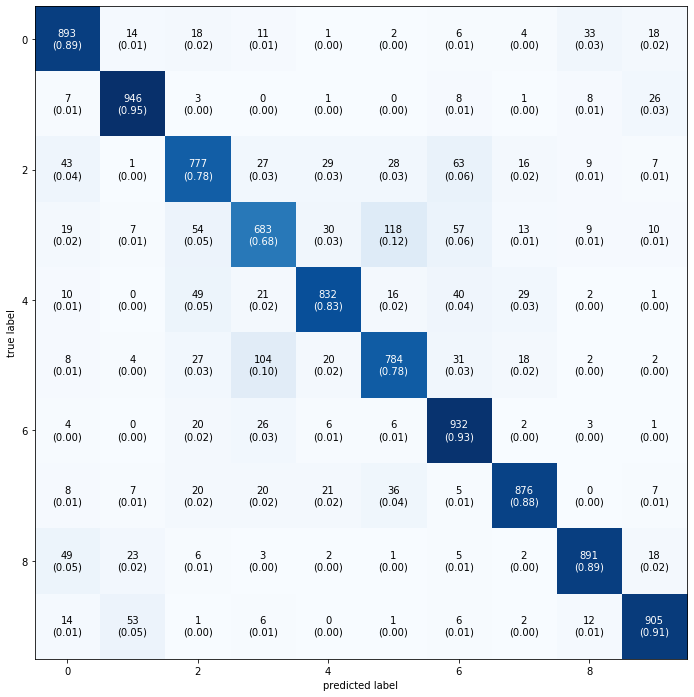

In [ ]:
import matplotlib
plot_confusion_matrix(mat,figsize=(12,12),show_normed=True,class_names=classes_name)

In [ ]:
import mlxtend  
print(mlxtend.__version__)   

0.14.0
